# Reference

* J. Stewart, Calculus: Early Transcendentals, 8th ed. Cengage Learning, 2015.

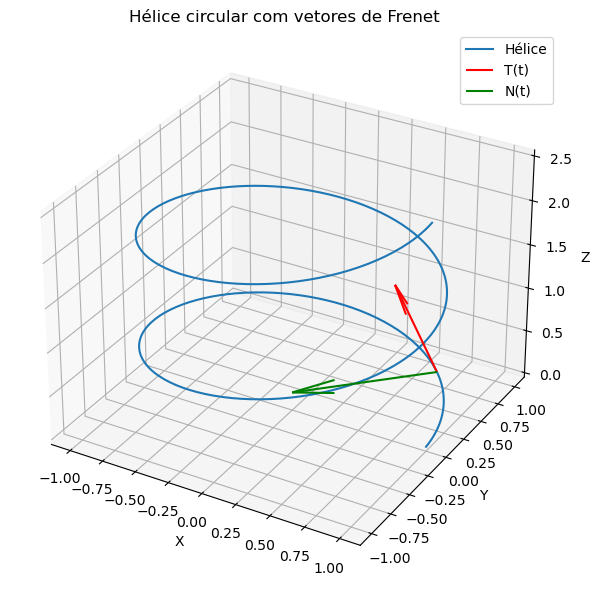

In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Símbolos
t, a, c = sp.symbols('t a c', real=True)

# Curva helicoidal
r = sp.Matrix([
    a * sp.cos(t),
    a * sp.sin(t),
    c * t
])

# Derivadas
r_prime = r.diff(t)
speed = sp.sqrt(r_prime.dot(r_prime))

# Vetor tangente unitário
T = r_prime / speed
T = sp.simplify(T)

# Vetor normal unitário
T_prime = T.diff(t)
kappa = sp.sqrt(T_prime.dot(T_prime))
N = sp.simplify(T_prime / kappa)

# Lambdify por componente (ESSENCIAL)
x_func = sp.lambdify((t, a, c), r[0], 'numpy')
y_func = sp.lambdify((t, a, c), r[1], 'numpy')
z_func = sp.lambdify((t, a, c), r[2], 'numpy')

Tx_func = sp.lambdify((t, a, c), T[0], 'numpy')
Ty_func = sp.lambdify((t, a, c), T[1], 'numpy')
Tz_func = sp.lambdify((t, a, c), T[2], 'numpy')

Nx_func = sp.lambdify((t, a, c), N[0], 'numpy')
Ny_func = sp.lambdify((t, a, c), N[1], 'numpy')
Nz_func = sp.lambdify((t, a, c), N[2], 'numpy')

# Parâmetros
a_val = 1.0
c_val = 0.2
t0 = np.pi / 4

# Curva
t_vals = np.linspace(0, 4*np.pi, 400)
x_vals = x_func(t_vals, a_val, c_val)
y_vals = y_func(t_vals, a_val, c_val)
z_vals = z_func(t_vals, a_val, c_val)

# Ponto específico
r0 = np.array([
    x_func(t0, a_val, c_val),
    y_func(t0, a_val, c_val),
    z_func(t0, a_val, c_val)
])

T0 = np.array([
    Tx_func(t0, a_val, c_val),
    Ty_func(t0, a_val, c_val),
    Tz_func(t0, a_val, c_val)
])

N0 = np.array([
    Nx_func(t0, a_val, c_val),
    Ny_func(t0, a_val, c_val),
    Nz_func(t0, a_val, c_val)
])

# Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot(x_vals, y_vals, z_vals, label='Hélice')

ax.quiver(*r0, *T0, color='red', length=1, normalize=True, label='T(t)')
ax.quiver(*r0, *N0, color='green', length=1, normalize=True, label='N(t)')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

plt.title('Hélice circular com vetores de Frenet')
plt.tight_layout()
plt.show()


<IPython.core.display.Javascript object>


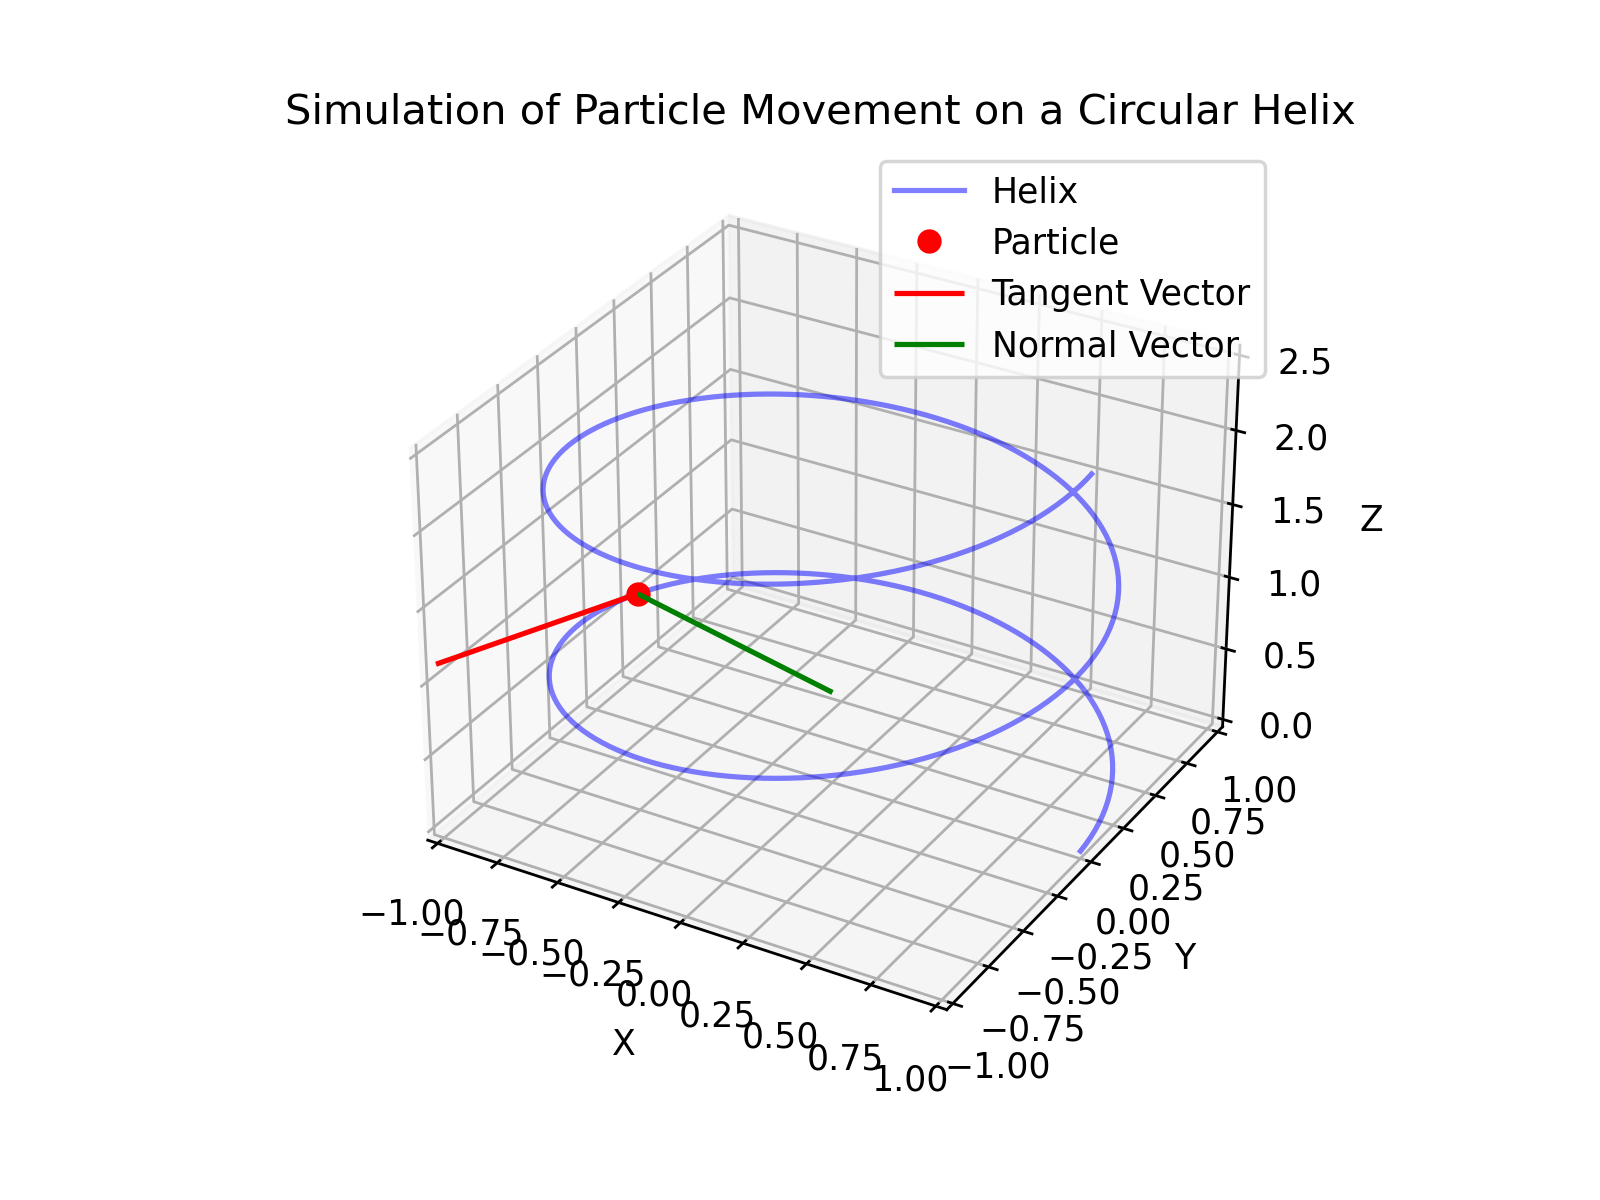

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Parameters
a = 1.0  # Radius of the helix
c = 0.2  # Vertical stretch factor
t_max = 4 * np.pi  # Total time for the animation
num_frames = 300  # Number of frames in the animation
%matplotlib notebook

# Function to compute the position on the helix at time t
def helix_position(t, a, c):
    x = a * np.cos(t)
    y = a * np.sin(t)
    z = c * t
    return np.array([x, y, z])

# Generate helix points for the background
t_vals = np.linspace(0, t_max, 300)
x_vals, y_vals, z_vals = helix_position(t_vals, a, c)

# Initialize the plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the helix
ax.plot(x_vals, y_vals, z_vals, label='Helix', color='blue', alpha=0.5)

# Initialize the point (particle)
point, = ax.plot([], [], [], 'ro', label='Particle')

# Initialize the tangent and normal vectors
tangent_vector = ax.quiver(0, 0, 0, 0, 0, 0, color='r', label='Tangent Vector')
normal_vector = ax.quiver(0, 0, 0, 0, 0, 0, color='g', label='Normal Vector')

# Setting labels and limits
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim([-a, a])
ax.set_ylim([-a, a])
ax.set_zlim([0, c * t_max])
ax.legend()

# Function to compute the tangent and normal vectors at time t
def compute_vectors(t, a, c):
    r_prime = np.array([-a * np.sin(t), a * np.cos(t), c])
    r_prime_magnitude = np.linalg.norm(r_prime)
    T = r_prime / r_prime_magnitude  # Tangent vector
    T_prime = np.array([-a * np.cos(t), -a * np.sin(t), 0]) / r_prime_magnitude
    T_prime_magnitude = np.linalg.norm(T_prime)
    N = T_prime / T_prime_magnitude  # Normal vector
    return T, N

# Animation function
def update(frame):
    t = frame * t_max / num_frames
    pos = helix_position(t, a, c)
    point.set_data([pos[0]], [pos[1]])
    point.set_3d_properties([pos[2]])
    
    T, N = compute_vectors(t, a, c)
    
    # Update tangent vector
    tangent_vector.set_segments([[[pos[0], pos[1], pos[2]], [pos[0] + T[0], pos[1] + T[1], pos[2] + T[2]]]])
    
    # Update normal vector
    normal_vector.set_segments([[[pos[0], pos[1], pos[2]], [pos[0] + N[0], pos[1] + N[1], pos[2] + N[2]]]])
    
    return point, tangent_vector, normal_vector

# Create the animation
ani = FuncAnimation(fig, update, frames=num_frames, interval=50, blit=True)

plt.title('Simulation of Particle Movement on a Circular Helix')
plt.show()